In [2]:
import pickle
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk.stem import porter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import os
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [3]:
true_df = pickle.load(open("pickle_files/true_df.pkl", "rb" ))
true_df_backup = pickle.load(open("pickle_files/true_df_backup.pkl", "rb" ))

In [4]:
true_df

,body,num_source,source,title
0,The following statements were posted to the ve...,2.0,Reuters,"Trump on Twitter (June 6): Mitch McConnell, Jo..."
1,"TEL AVIV (Reuters) - Donald Trump’s attorney, ...",2.0,Reuters,Giuliani says Mueller's investigators trying t...
2,WASHINGTON (Reuters) - U.S. House of Represent...,2.0,Reuters,House Speaker doubtful of NAFTA passage in cur...
3,BRUSSELS (Reuters) - U.S. Defense Secretary Ji...,2.0,Reuters,"In Europe, Mattis is in familiar spot: calming..."
4,"WASHINGTON/MORRISTOWN, N.J. (Reuters) - A lawy...",2.0,Reuters,Lawyer to ex-Trump campaign aide Manafort taps...
5,"WASHINGTON (Reuters) - Mick Mulvaney, the inte...",2.0,Reuters,Trump's consumer financial chief disbands key ...
6,WASHINGTON (Reuters) - Facebook Inc (FB.O) sai...,2.0,Reuters,Facebook confirms data sharing with Chinese co...
9,WASHINGTON (Reuters) - U.S. President Donald T...,2.0,Reuters,"Trump to have meetings with France's Macron, C..."
10,"SACRAMENTO, Calif./PRINCETON, N.J. (Reuters) -...",2.0,Reuters,Democratic hopes for House control buoyed by v...
12,"SACRAMENTO, Calif./PRINCETON, N.J. (Reuters) -...",2.0,Reuters,Democrats beat vote quirk to challenge Republi...


In [89]:
sample_df = true_df.sample(n=500)

In [90]:
sample_df.head()

,body,num_source,source,title
5106,"\n\n\n\n\nTrending\n\nWinners, losers and joke...",11.0,Alabama Today,\n\t\t\tSenators considering a delay for VA co...
106,\n\n\n\nAs a witness of the broadcast of RFK’s...,5.0,Global Research,RFK’s Son Robert Francis Kennedy Jr: I Don’t B...
274,"Don Blankenship is not going away quietly, muc...",3.0,Daily Beast,Don Blankenship Announces Intent to Run Third-...
654,NEW YORK (Reuters) - A lawyer for U.S. Preside...,2.0,Reuters,Cohen attorney assails Stormy Daniels' lawyer;...
40,\n\n\n\n\n\n×\n\n\n\n\n\n\n\n\n\n\n ...,6.0,Associate Press,Kurdish militia to exit Syria's Manbij under U...


In [28]:
words=pos_tag(word_tokenize("Who's going to that thing today?"))
for w in words:
    print(w[1])

WP
VBZ
VBG
TO
DT
NN
NN
.


In [92]:
stemmer = porter.PorterStemmer()
stopwords = stopwords.words()

AttributeError: 'list' object has no attribute 'words'

In [93]:
def clean_text(text):
    '''Removes stop words and changes word to stem words'''
    cleaned_text = []
    for post in text:
        cleaned_words = []
        for word in post.split():
            low_word = stemmer.stem(word.lower())
            if low_word not in stopwords:
                cleaned_words.append(low_word)
        cleaned_text.append(' '.join(cleaned_words))
    return cleaned_text

In [94]:
cleaned_text = clean_text(sample_df.body)

In [55]:
'''with open('clean_text.pkl', 'wb') as picklefile:
        pickle.dump(clean_text, picklefile)'''

In [13]:
'''clean_text = pickle.load(open("pickle_files/clean_text.pkl", "rb" ))'''


In [111]:
cleaned_text[4]

"× file - march 28, 2018 file photo, syrian fighter kurdish police, guard entranc manbij militari council kurdish led militia group defend manbij, north syria. people' protect units, known kurdish acronym ypg, said statement tuesday, june 5, 2018, it' pull key northern syrian town manbij, potenti eas seriou rift unit state turkey. said advis complet mission train manbij militari council, defend town manbij. (ap photo/hussein malla, file) file - april 4, 2018 file photo, u.s-back syrian manbij militari council soldier pass u.s. posit near tens front line turkish-back fighters, manbij, north syria. people' protect units, known kurdish acronym ypg, said statement tuesday, june 5, 2018, it' pull key northern syrian town manbij, potenti eas seriou rift unit state turkey. (ap photo/hussein malla, file) file - march 29, 2018 file photo, fighter u.s-back syrian manbij militari council stand behind sand barrier look toward turkish-back fighters' posit front line halawanji village, north manbij 

In [50]:
data1 = clean_text[0:515]
print(len(data1))
data2 = clean_text[516:1031]
print(len(data2))
data3 = clean_text[1032:1547]
print(len(data3))
data4 = clean_text[1548:2063]
print(len(data4))
data5 = clean_text[2064:2579]
print(len(data5))
data6 = clean_text[2580:3095]
print(len(data6))
data7 = clean_text[3096:3611]
print(len(data7))
data8 = clean_text[3611:4092]
print(len(data8))

515
515
515
515
515
515
515
481


In [112]:
def drop_nouns(text_list):
    no_nouns = []
    cleaned_text = []
    all_nouns = ['NN' or 'NNS' or 'NNP' or 'NNPS']
    for x in text_list:
        words=pos_tag(word_tokenize(x))
        werdz = [s for s in words if s[-1] != 'NN']# or 'NNS' or 'NNP' or 'NNPS']
        werdz = [s for s in werdz if s[-1] != 'NNS']
        werdz = [s for s in werdz if s[-1] != 'NNPS']
        werdz = [s for s in werdz if s[-1] != 'NNP']
        werdz = [s for s in werdz if s[-1] != ',']
        werdz = [s for s in werdz if s[-1] != '.']
        werdz = [s for s in werdz if s[-1] != ':']
        werdz = [s for s in werdz if s[-1] != 'CD']
        werdz = [s for s in werdz if s[-1] != '(']
        werdz = [s for s in werdz if s[-1] != ')']
        werdz = [s for s in werdz if s[-2] != '@']
        werdz = [s for s in werdz if s[-2] != '[']
        werdz = [s for s in werdz if s[-2] != ']']
        werdz = [s for s in werdz if s[-2] != 'amp']

        #check cleaned text line from function above
        no_nouns.append(werdz)
    return no_nouns

In [113]:
no_nouns_part1 = drop_nouns(cleaned_text)

In [4]:
'''text_w_no_nouns = pickle.load(open("pickle_files/text_w_no_nouns.pkl", "rb" ))'''

In [114]:
short_text = []
clear = []
for text in no_nouns_part1:
    for part in text:
        clear.append(part[0])
    short_text.append(' '.join(clear))

In [59]:
short_text[0]

'follow account u.s. u.s. hold america great nashvil u.s. may own great mayb democrat final done accept high high need border great big even fake said trump big much bigger ever thought possible much big may big red work hard whose great wa honor white wa fantast morn special fake unfair vicious great first recoveri surgeri everyth near left and me n.y. fake realli well sourc bengaluru bureauour'

In [115]:
os.system('say "your move Commander"')

0

In [ ]:
'''with open('short_text.pkl', 'wb') as picklefile:
        pickle.dump(short_text, picklefile)'''

In [3]:
'''cleaned_text = pickle.load(open("pickle_files/clean_text.pkl", "rb" ))'''

In [116]:
count_vectorizer2 = CountVectorizer(ngram_range=(1, 4),  
                                   stop_words='english', 
                                   token_pattern="\\b[a-z][a-z]+\\b",
                                   lowercase=True,
                                   max_df = 0.6)

X = count_vectorizer2.fit_transform(short_text)

In [117]:
n_topics = 20
n_iter = 10
lda = LatentDirichletAllocation(n_topics=n_topics,
                                max_iter=n_iter,
                                random_state=42,
                               learning_method='online')
X_centered_projected = lda.fit_transform(X)

/Users/NickThomas/Desktop/anaconda/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


In [118]:
def display_topics(model, feature_names, no_top_words):
    '''Creates a list of words in each topics'''
    for ix, topic in enumerate(model.components_):
        print("Topic ", ix+1)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
display_topics(lda,count_vectorizer2.get_feature_names(),20)

Topic  1
cake ukrain arpaio ukraine senior white greiten irish auto ira dnc naifa redish redacted nielsen pruitt eagan klipa randal decosta klipa strzok br br
Topic  2
greiten kelton ukrain irish ukraine cake arpaio senior white hous strzok entrekin senior white anti religi eagan stavridi mortensen naifa monsanto breitbart reported pruitt auto
Topic  3
greiten ukraine arpaio ukrain senior white auto dnc irish strzok cake eagan naifa redacted senior white hous redish helt invit cfpb nielsen auto ira
Topic  4
ukrain cake greiten irish arpaio naifa ukraine auto senior white senior white hous entrekin michigan colorado yanukovych invit venezuela pruitt monsanto kelton decosta
Topic  5
irish arpaio ukrain kelton greiten cake entrekin michigan pruitt senior white shirkey strzok emelianenko stavridi aclu mutat redish launcher naifa eagan
Topic  6
arpaio greiten ukrain ukraine strzok naifa senior white irish redish auto auto ira senior white hous eagan decosta launcher redacted cake hous told 

In [119]:
SSEs = []
Sil_coefs = []
for k in range(2,21):
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X_centered_projected)
    labels = km.labels_
    Sil_coefs.append(silhouette_score(X_centered_projected, labels, metric='euclidean'))
    SSEs.append(km.inertia_) 

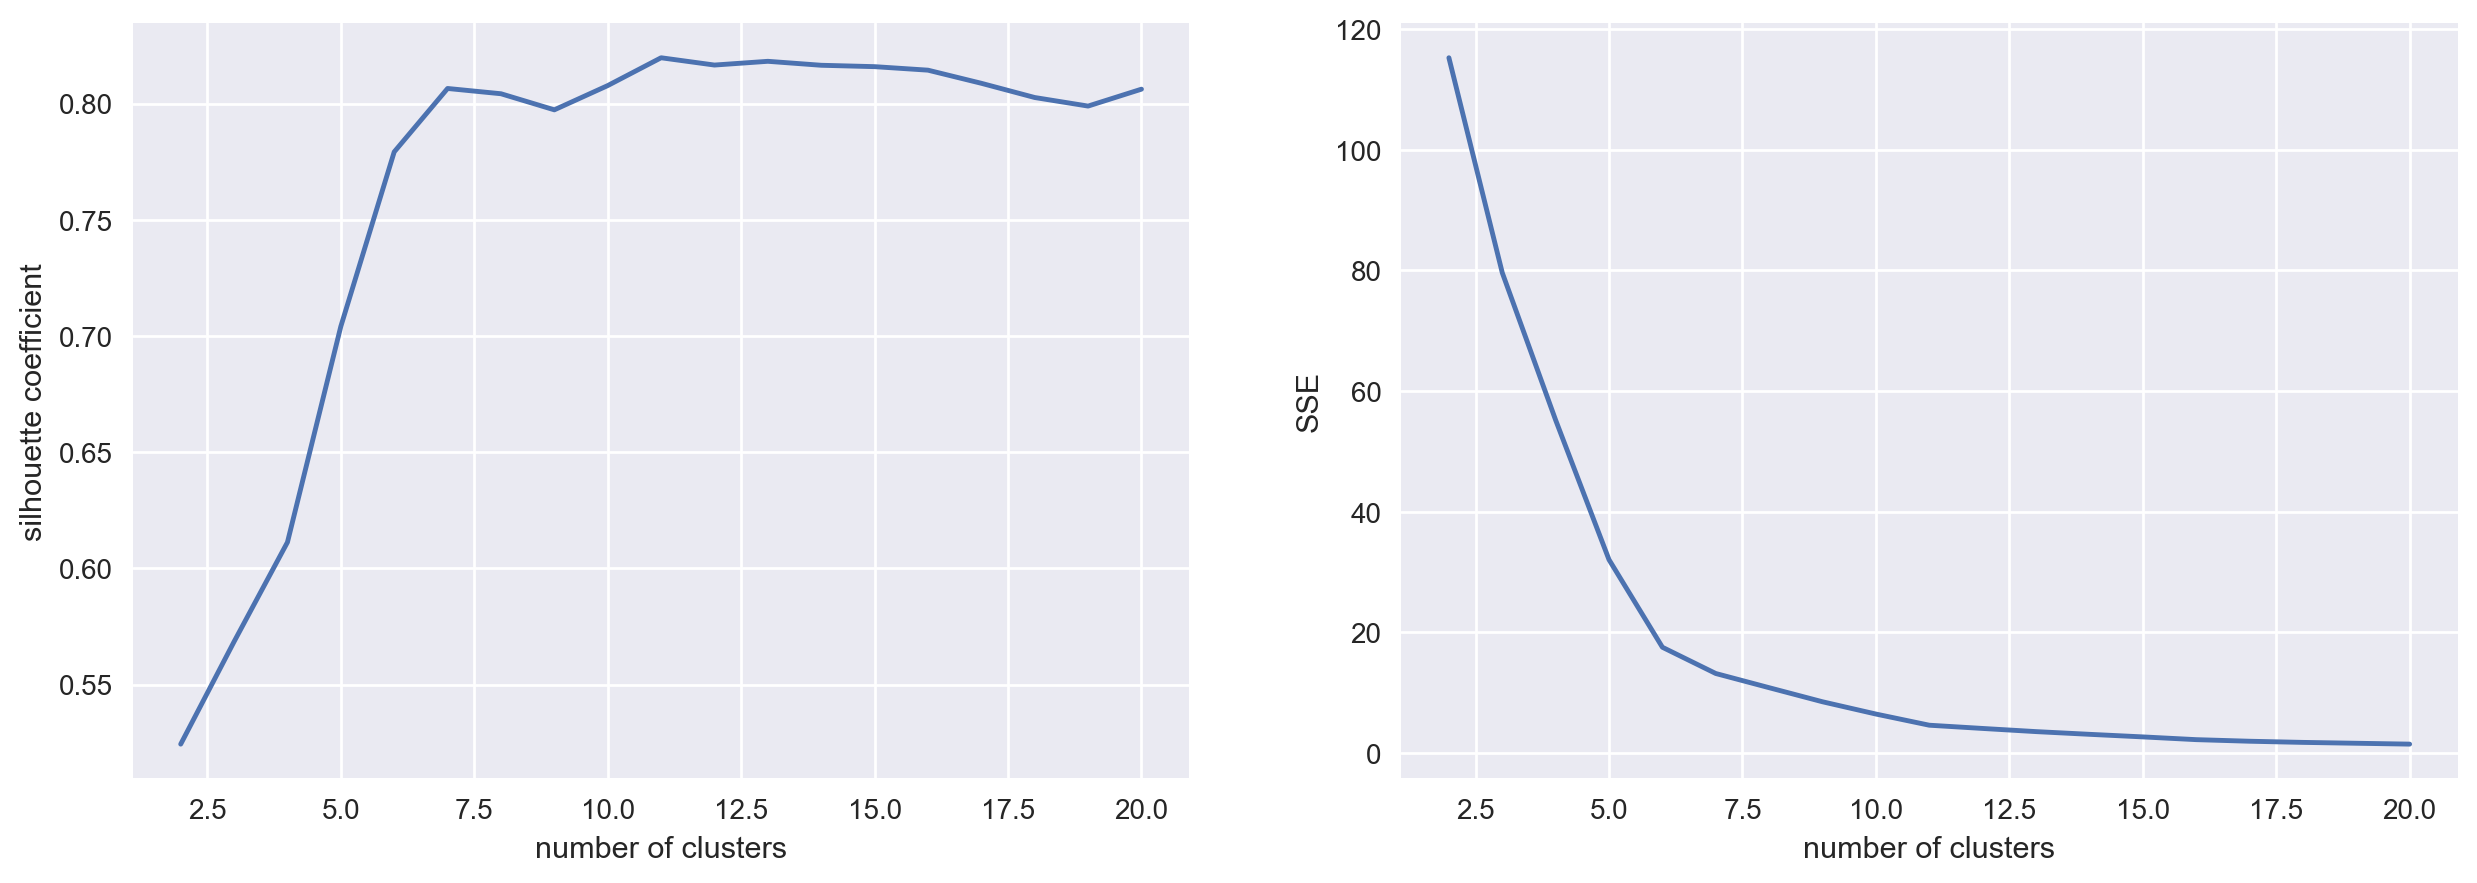

In [120]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharex=True, dpi=200)
k_clusters = range(2,21)
ax1.plot(k_clusters, Sil_coefs)
ax1.set_xlabel('number of clusters')
ax1.set_ylabel('silhouette coefficient')

# plot here on ax2
ax2.plot(k_clusters, SSEs)
ax2.set_xlabel('number of clusters')
ax2.set_ylabel('SSE');

In [68]:
km = KMeans(n_clusters=20)
clusts = km.fit_predict(X_centered_projected)

In [71]:
centers = km.cluster_centers_
centers

array([[9.45032045e-07, 9.45032062e-07, 2.62917196e-01, 9.45032046e-07,
        1.59432678e-04, 9.45032045e-07, 9.45032045e-07, 9.45032045e-07,
        3.44113765e-03, 9.45032045e-07, 9.45032045e-07, 9.45032045e-07,
        9.45032045e-07, 9.45032045e-07, 9.45032045e-07, 9.45032045e-07,
        9.45032045e-07, 9.45032063e-07, 4.20935104e-03, 7.29258707e-01],
       [5.00000000e-02, 5.00000000e-02, 5.00000000e-02, 5.00000000e-02,
        5.00000000e-02, 5.00000000e-02, 5.00000000e-02, 5.00000000e-02,
        5.00000000e-02, 5.00000000e-02, 5.00000000e-02, 5.00000000e-02,
        5.00000000e-02, 5.00000000e-02, 5.00000000e-02, 5.00000000e-02,
        5.00000000e-02, 5.00000000e-02, 5.00000000e-02, 5.00000000e-02],
       [1.26875080e-05, 1.26875081e-05, 1.26875081e-05, 1.26875080e-05,
        1.26875081e-05, 1.26875080e-05, 1.26875080e-05, 1.26875080e-05,
        9.98790780e-01, 1.26875080e-05, 1.26875080e-05, 1.26875080e-05,
        1.26875080e-05, 1.26875080e-05, 1.26875080e-05, 1.2687

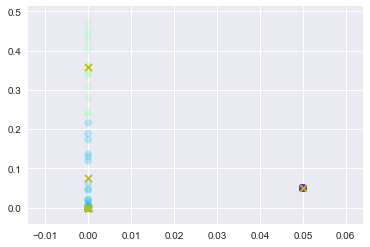

In [72]:
plt.scatter(X_centered_projected[:, 0], X_centered_projected[:, 1], c=clusts, cmap=plt.cm.rainbow, alpha=0.25)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='y')
#plt.xlim(-.5,1.5)
#plt.ylim(1.5,4.5)

In [121]:
os.system('say "your move Commander"')

0